<a href="https://colab.research.google.com/github/brainmentorspvtltd/DU_PythonDLApril/blob/main/CNN_TrafficSignDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = 'brainmentors'
os.environ['KAGGLE_KEY'] = 'ce4a81b91ebed426cc8183b209f2724e'

!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

100% 609M/612M [00:08<00:00, 121MB/s]
100% 612M/612M [00:08<00:00, 75.4MB/s]


In [ ]:
!unzip gtsrb-german-traffic-sign.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

In [ ]:
import pandas as pd

In [ ]:
df_train = pd.read_csv('Train.csv')

In [ ]:
df_train.shape

(39209, 8)

In [ ]:
# first 5 observations of your dataset
df_train.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [ ]:
df_train.iloc[0]

Width                                  27
Height                                 26
Roi.X1                                  5
Roi.Y1                                  5
Roi.X2                                 22
Roi.Y2                                 20
ClassId                                20
Path       Train/20/00020_00000_00000.png
Name: 0, dtype: object

In [ ]:
# opencv-python
# PIL - Python Image Library

In [ ]:
from PIL import Image
import numpy as np

In [ ]:
# np.array(Image.open(df_train['Path'][0]))

In [ ]:
import matplotlib.pyplot as plt

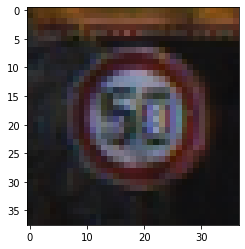

In [ ]:
plt.imshow(np.array(Image.open(df_train['Path'][3800])))

In [ ]:
def load_data(df):
  images = []
  labels = []

  for i in range(len(df)):
    img = Image.open(df['Path'].iloc[i])
    img = img.resize((50,50))
    images.append(np.array(img))
    labels.append(df['ClassId'].iloc[i])

  return images, labels

In [ ]:
train_data, train_labels = load_data(df_train)

df_test = pd.read_csv('Test.csv')

test_data, test_labels = load_data(df_test)

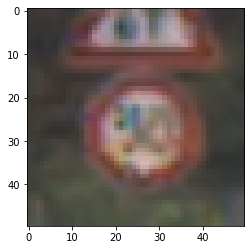

In [ ]:
plt.imshow(train_data[4500])

In [ ]:
train_data = np.asarray(train_data)
test_data = np.asarray(test_data)

In [ ]:
train_data = train_data / 255.0
test_data = test_data / 255.0

In [ ]:
train_data.shape

(39209, 50, 50, 3)

In [ ]:
len(train_labels)

39209

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
onehot = OneHotEncoder()
train_labels = np.reshape(train_labels, (-1,1))
train_labels = onehot.fit_transform(train_labels).toarray()

In [ ]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
len(train_labels[0])

43

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras import Model
import tensorflow as tf

In [ ]:
# Model - pre-defined class that we are inheriting
class MyModel(Model):
  # __init__ - constructor
  # self = this (which refers to the current object)
  def __init__(self):
    # super - it is used to call __init__ of parent (Model) class
    super().__init__()
    self.conv1 = Conv2D(32, 3, activation='relu')
    self.pool1 = MaxPool2D((2,2))
    self.conv2 = Conv2D(64, 3, activation='relu')
    self.pool2 = MaxPool2D((2,2))
    self.flatten = Flatten()
    self.dense1 = Dense(512, activation='relu')
    self.dropout1 = Dropout(0.4)
    self.dense2 = Dense(128, activation='relu')
    self.dropout2 = Dropout(0.4)
    self.dense3 = Dense(43, activation='softmax')
    
  
  def call(self, x):
    x = self.conv1(x)
    x = self.pool1(x)
    x = self.conv2(x)
    x = self.pool2(x)
    x = self.flatten(x)
    x = self.dense1(x)
    x = self.dropout1(x)
    x = self.dense2(x)
    x = self.dropout2(x)
    x = self.dense3(x)
    return x

model = MyModel()

In [ ]:
loss_object = tf.keras.losses.CategoricalCrossentropy()
optimization = tf.keras.optimizers.Adam()

In [ ]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.CategoricalAccuracy(name='train_acc')

In [ ]:
train_df = tf.data.Dataset.from_tensor_slices((train_data, train_labels)).shuffle(10000).batch(32)

In [ ]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    predictions = model(images)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimization.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)


In [ ]:
epochs = 5
for epoch in range(epochs):
  for images, labels in train_df:
    train_step(images, labels)

  print("Epoch : {}, Loss : {}, Accuracy : {}".format(epoch, train_loss.result(), train_accuracy.result()))
  train_loss.reset_states()
  train_accuracy.reset_states()

Epoch : 0, Loss : 0.5982797741889954, Accuracy : 0.8369762301445007
Epoch : 1, Loss : 0.06761099398136139, Accuracy : 0.9808717370033264
Epoch : 2, Loss : 0.04092114046216011, Accuracy : 0.9884210228919983
Epoch : 3, Loss : 0.02680826187133789, Accuracy : 0.9925272464752197
Epoch : 4, Loss : 0.023323893547058105, Accuracy : 0.9933688640594482


In [ ]:
# 32,50,50,3

predictions = np.argmax(model(test_data), axis=1)

In [ ]:
predictions[0]

16

In [ ]:
test_labels[0]

16